<a href="https://www.kaggle.com/code/prasadposture121/digit-recognizer-beginner-s-approch?scriptVersionId=190637787" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div style="color:#00ADB5;
               display:fill;
               border-radius:5px;
               background-color:#393E46;
               font-size: 30px;
               font-family:sans-serif;
               letter-spacing:0.5px">
            <p style="padding: 10px;
                  color:white;">
                <b> Digit Recognizer</b>
            </p>
    </div>

# RandomForestClassifier

## Importing dependencies

In [1]:
#libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

#functions
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

## Reading data

In [2]:
#Using pandas to read datasets stored in the same foldeer
data=pd.read_csv('../input/digit-recognizer/train.csv') #data for training
pdata=pd.read_csv('../input/digit-recognizer/test.csv') #data for predictions

In [3]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
pdata.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Missing Values
print('Shape of train data:', data.shape)
print('Shape if we drop missing values from train data:', data.dropna(how='any').shape )
print('Shape of prediction data:', pdata.shape)
print('Shape if we drop missing values from prediction data:', pdata.dropna(how='any').shape )
# Conclusion : Both datasets don't have missing values in them.

Shape of train data: (42000, 785)
Shape if we drop missing values from train data: (42000, 785)
Shape of prediction data: (28000, 784)
Shape if we drop missing values from prediction data: (28000, 784)


In [6]:
input_cols = list(data.columns)
input_cols.remove('label')

In [7]:
data[input_cols]=data[input_cols]/max(data.describe().loc['max'])

## Visualizing digits
We can visualize the digit stored in any row using pyplot.

In [8]:
#Extracting data from data set and viweing them up close
a=data.iloc[3,1:].values

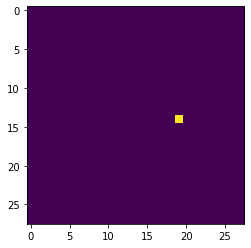

In [9]:
#reshaping the the extracted data into reasonable size
a=a.reshape(28,28).astype('uint8')
plt.imshow(a)
#it gives 4 and from the labels of train data we can infact see that it is four

## Preparing the data

In [10]:
#Seperating data and label values
x=data.iloc[:,1:] #independent variables
Y=data.iloc[:,0] #dependent variable

In [11]:
#Creating test and train size batches
x_train, x_test, Y_train, Y_test= train_test_split(x, Y, test_size=0.2, random_state=4)

In [12]:
x_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
32576,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34735,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3476,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16211,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
Y_train.head()

32576    5
34735    0
3476     3
27750    0
16211    3
Name: label, dtype: int64

 ## Modeling

In [14]:
#Call Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100)

In [15]:
#fit the model
rf.fit(x_train, Y_train)

RandomForestClassifier()

In [16]:
#Prediction on test data
pred=rf.predict(x_test)
pred

array([0, 4, 0, ..., 0, 3, 1])

### Accuracy

In [17]:
#checking prediction accuracy
s=Y_test.values
#calculating number of correctly predicted values
count=0
for i in range(len(pred)):
    if pred[i]==s[i]:
        count+=1
count

8081

In [18]:
#total values on which the prediction was run on
total_values=len(pred)
total_values

8400

In [19]:
#Accuracy value
Accuracy=count/total_values
Accuracy

0.9620238095238095

## Predictions

In [20]:
#Making predictions on test data
y_pred=rf.predict(pdata)

In [21]:
#Creating data frame out of predictions
submission=pd.DataFrame({'ImageId':pdata.index,'Label':y_pred})
submission.ImageId=submission.ImageId.apply(lambda i:i+1) #lambda function for adjusting indices
#Saving Submmsion
submission.to_csv('RFCSubmission.csv',index=False)
submission.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [22]:
submission.shape

(28000, 2)

## Matching with Predictions
Here we will try to match the random predicted values with actual values of digits, that we can get using pyplot.

In [23]:
#function for matching digits extracted from prediction data using pyplot and from predicted values using indices
def see_digit(i):
    print('Value Predicted by RandomForestClassifier():',submission['Label'][i])
    print('Actual value in the prediction data : ')
    a=pdata.iloc[i,0:].values
    a=a.reshape(28,28).astype('uint8')
    plt.imshow(a)
    plt.show()

Value Predicted by RandomForestClassifier(): 7
Actual value in the prediction data : 


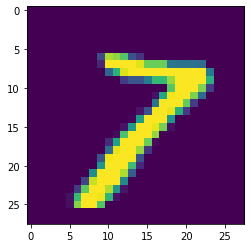

Value Predicted by RandomForestClassifier(): 5
Actual value in the prediction data : 


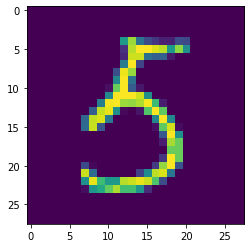

Value Predicted by RandomForestClassifier(): 2
Actual value in the prediction data : 


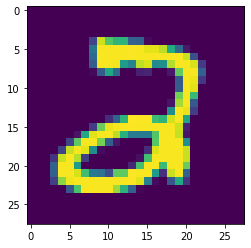

Value Predicted by RandomForestClassifier(): 8
Actual value in the prediction data : 


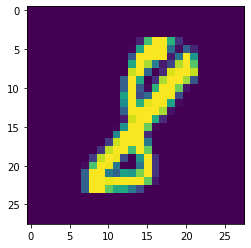

Value Predicted by RandomForestClassifier(): 8
Actual value in the prediction data : 


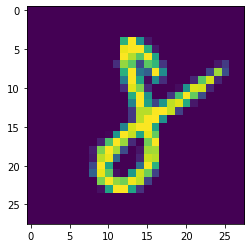

In [24]:
#Checking for random predicted values by indices
indices=[234,454,873,123,654]
for i in indices: 
    see_digit(i)

Conclusion : Our model is fairly accurate.

# ANN

## Importing Dependencies

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score, accuracy_score

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, TensorDataset, random_split
# from torch ? for loss # we will need cross entropy loss since multiple classes are involved

## Reading the data

In [26]:
train = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

## Data Preprocessing

In [27]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoder.fit(train[['label']])
encoded_cols = list(encoder.get_feature_names_out(['label']))
train[encoded_cols] = encoder.transform(train[['label']])

In [28]:
train.drop(labels=['label'], inplace=True, axis=1)

In [29]:
X_train = train.drop(labels=encoded_cols, axis=1).values
Y_train = train[encoded_cols].values
X_test = test.values

X_train = X_train/255
X_test  = X_test/255

## Loading the data

In [30]:
input_tensor = torch.tensor(X_train, dtype=torch.float32)
output_tensor = torch.tensor(Y_train, dtype=torch.float32)
dataset = TensorDataset(input_tensor, output_tensor)
train_size = round(len(dataset)*0.8)
val_size = len(dataset)-train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])
batch_size = 100 # can change later
train_loader = DataLoader(train_dataset,batch_size = batch_size, shuffle=True, num_workers=4 ) # for number of cores at work
val_loader  = DataLoader(val_dataset, batch_size = len(val_dataset)) # do we need this cause this doesn't make any sense
# Since the iteration over the batches is done for optimizing weights more efficiently

## Architecture

In [31]:
# Model Architecture
class ANN(nn.Module):
    def __init__(self, input_features, n_class):
        super(ANN, self).__init__()
        self.l1 = nn.Linear(input_features, 256)
        self.l2 = nn.Linear(256, 64)
#         self.l3 = nn.Linear(128, 64)
#         self.l4 = nn.Linear(64, 32)
        self.l5 = nn.Linear(64, n_class)
    
    def forward(self, x):
        x = torch.relu(self.l1(x))
        x = torch.relu(self.l2(x))
#         x = torch.relu(self.l3(x))
#         x = torch.relu(self.l4(x))
        x = self.l5(x)
        return x

# Pushing Model to GPU if it is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = ANN(input_features=784, n_class = 10).to(device)

## Training and Evaluation

In [32]:
criterion = nn.CrossEntropyLoss() #what are the parameters given inside mean?
optimizer = optim.Adam(model.parameters(), lr=0.001)

early_stopping_patience = 5
min_val_loss = float('inf')
patience_counter = 0

true_num_epochs = 0
num_epochs = 10
training_loss = []
validation_loss = [float('inf')]
# training_r2 = [] # considered for only problems which have MSE involved
# validation_r2 = []

for i in range(num_epochs):
    model.train() #setting the model in trainig mode
    train_loss = 0.0
    for inputs, targets in train_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad() # setting the gradient zero o.w. it gets added up which every loop whenever evaluated
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward() # backward propogation by using the map that was initilized during the operations
        optimizer.step() # changing the weights i.e. model parameters based learning rate
        train_loss+= loss.item()*inputs.size(0) #loss.item() gives mean loss for 1 batch, x inputs.size(0) gives the loss for one entire batch 
        #+=train_loss adds the loss for entire iteration over all the batches i.e. 1 run or 1 epoch
        # hence you get train_loss for entire training set : verified
#     r2_train = r2_score(targets.detach().cpu().numpy(), outputs.detach().cpu().numpy()) #caculating r2 score for the last batch (make sense since r2 goes down till then)
#     training_r2.append(r2_train) 
    train_loss/=len(train_loader.dataset) #gives loss for a single data point (mean)
    # initially we have gotten the loss for entire trainining dataset
    # now we take divide it by length hence giving us loss for single data point
    model.eval() # setting the model for evaluation
    
    with torch.no_grad():  # making sure the grad is zero since we dont want to propagate it through the map
        for inputs, targets in val_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
#             r2_val = r2_score(targets.cpu().numpy(), outputs.cpu().numpy())
#             validation_r2.append(r2_val)
            val_loss = criterion(outputs, targets)
    if val_loss.item()>validation_loss[-1]:
        print("Not Improving")
        torch.save(model.state_dict(), 'good_model.pth')
        break
    validation_loss.append(val_loss.item())
    training_loss.append(train_loss)
    true_num_epochs+=1
    print(f"Epoch:{i+1}/{num_epochs}, Training Loss:{train_loss:.5f}, Validation Loss:{val_loss:.5f}")#, Training R^2:{r2_train}, Validation R^2:{r2_val}")

Epoch:1/10, Training Loss:0.45497, Validation Loss:0.22387
Epoch:2/10, Training Loss:0.17921, Validation Loss:0.15517
Epoch:3/10, Training Loss:0.12121, Validation Loss:0.14606
Epoch:4/10, Training Loss:0.08922, Validation Loss:0.12752
Epoch:5/10, Training Loss:0.06798, Validation Loss:0.11899
Epoch:6/10, Training Loss:0.05208, Validation Loss:0.10424
Epoch:7/10, Training Loss:0.04160, Validation Loss:0.10315
Not Improving


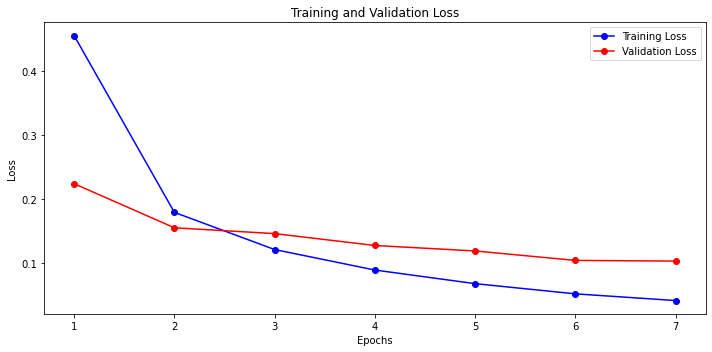

In [33]:
epochs = range(1, int(true_num_epochs) + 1)

plt.figure(figsize=(10, 5))

plt.plot(epochs, training_loss, 'b-o', label='Training Loss')
plt.plot(epochs, validation_loss[1:], 'r-o', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

## Predictions

In [34]:
test_input_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
model.eval()
with torch.no_grad():
    outputs = model(test_input_tensor)
    probabilities = torch.softmax(outputs, dim=1)
    predicted_classes = torch.argmax(probabilities, dim=1)
predicted_classes = predicted_classes.cpu().numpy()

submission = pd.read_csv('/kaggle/input/digit-recognizer/sample_submission.csv')
submission['Label'] = predicted_classes
submission.to_csv('ANNSubmission.csv',index=False)
submission.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


The End